# Boston House Prediction


# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Importing Data

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
data=pd.DataFrame(boston.data)

In [4]:
data.columns = boston.feature_names


In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data['Price'] = boston.target

In [7]:
data.shape

(506, 14)

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [9]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [10]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [12]:
# see rows with missing values

data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price


In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# Finding correlation between the features

corr = data.corr()
corr.shape

(14, 14)

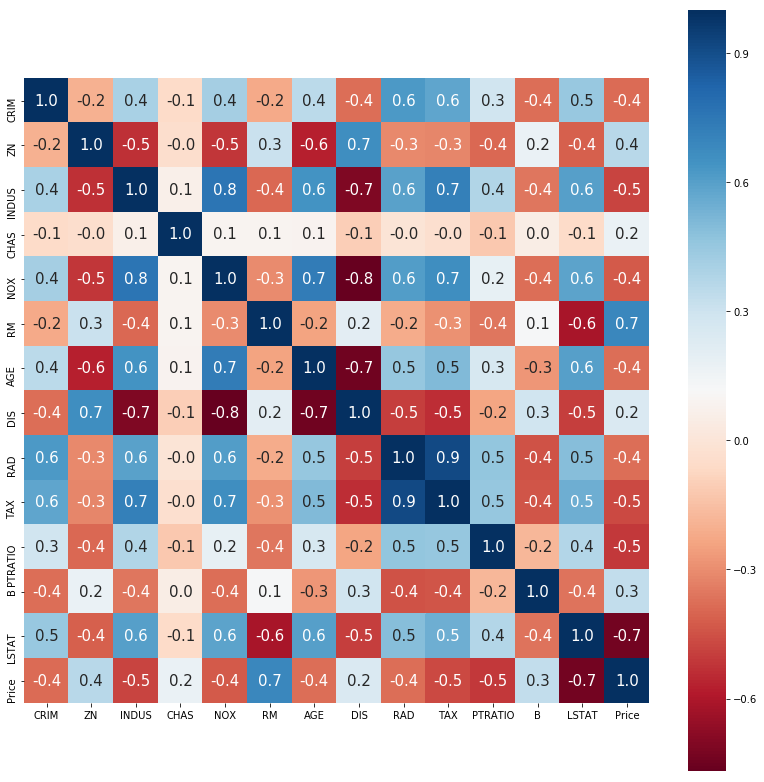

In [15]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='RdBu');

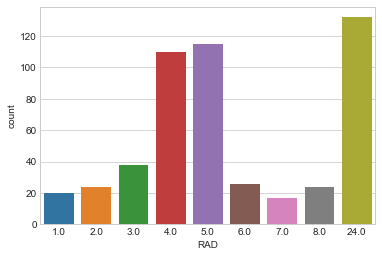

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='RAD', data=data);

### Counting for RAD values

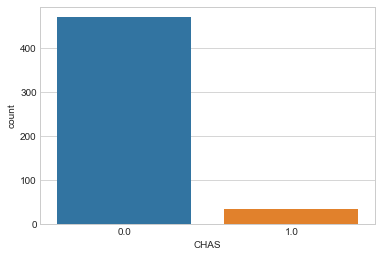

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS', data=data );

### Counting for CHAS feature

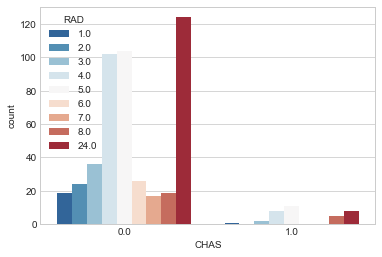

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS', hue='RAD', data=data, palette ='RdBu_r');

### CHAS data

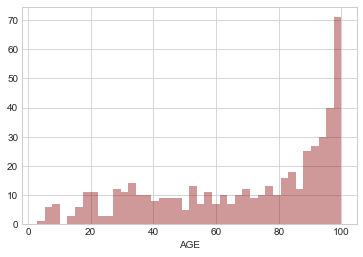

In [20]:
sns.distplot(data['AGE'].dropna(),kde=False, color='darkred', bins=40);

### House's age features understanding 

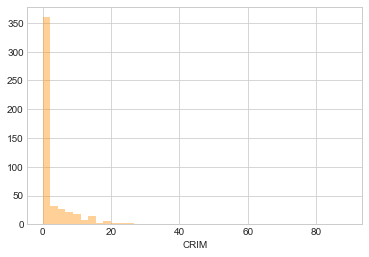

In [21]:
sns.distplot(data['CRIM'].dropna(),kde=False, color='darkorange', bins=40);

### CRIM Rate

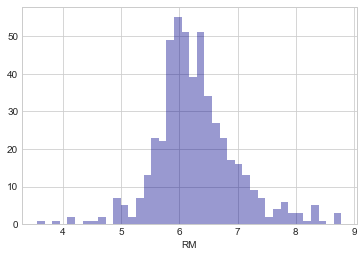

In [22]:
sns.distplot(data['RM'].dropna(),kde=False, color='darkblue', bins=40);

### Understanding Number of Rooms into the house

### Feature Selection

In [23]:
X = data.drop(['Price'],axis=1)
y=data['Price']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Regression Models

## Linear Regression

In [25]:
# Training the model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# converting coeffcients values to a dataframe

coeffcients= pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients=coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.0556777
2,INDUS,-0.00883428
3,CHAS,4.69345
4,NOX,-14.4358
5,RM,3.28008
6,AGE,-0.00344778
7,DIS,-1.55214
8,RAD,0.32625
9,TAX,-0.0140666


### Model Evaluation

In [27]:
# Model prediction on train data

y_pred=lm.predict(X_train)

In [28]:
print("R^2 Error:", metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 -( 1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

R^2 Error: 0.746599196675
Adjusted R^2: 0.73691034243


In [29]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 3.08986109497
Mean Squared Error: 19.0736887035
Root Mean Squared Error: 4.36734343777


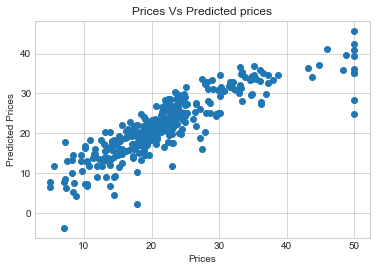

In [30]:
# Visualizing the difference B/w actual price and predicted values

plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices Vs Predicted prices")
plt.show();

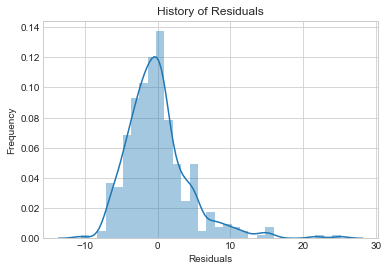

In [31]:
# Checking Normality of errors

sns.distplot(y_train-y_pred)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("History of Residuals")
plt.show();


### Here the residuals are normally distributed. So normality assumption is satisfied

### For test data

In [32]:
# Predicting Test data with the model

y_test_pred = lm.predict(X_test)

In [33]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test,y_test_pred)
print("R^2 Error:", acc_linreg)


R^2 Error: 0.712046162422


In [34]:
print('Adjusted R^2:',1 -( 1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Adjusted R^2: 0.73691034243


In [35]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3.86706939466
Mean Squared Error: 30.0681605337
Root Mean Squared Error: 5.48344422181


# Random Forest Regressor

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = RandomForestRegressor()

In [ ]:
reg.fit(X_train, y_train) 

### Model Evaluation

In [122]:
y_pred = reg.predict(X_train) 

In [123]:
print("R^2 Error:", metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 -( 1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


R^2 Error: 0.962612027243
Adjusted R^2: 0.961182487108


In [114]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_train, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 0.945225988701
Mean Squared Error: 2.06603305085
Root Mean Squared Error: 1.43737018574


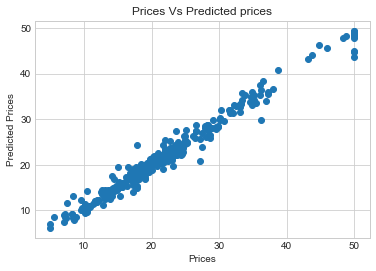

In [115]:
# Visualizing the difference B/w actual price and predicted values

plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices Vs Predicted prices")
plt.show();

### For test data

In [117]:
# Predicting Test data with the model

y_test_pred = lm.predict(X_test)

In [118]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test,y_test_pred)
print("R^2 Error:", acc_linreg)
print('Adjusted R^2:',1 -( 1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

R^2 Error: 0.712046162422
Adjusted R^2: 0.97150252705


In [195]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3.86706939466
Mean Squared Error: 30.0681605337
Root Mean Squared Error: 5.48344422181


# Random Forest Gives Best Result.